# Import Libraries

In [6]:
import numpy as np
import pandas as pd

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel
from gensim.models import CoherenceModel

# import spacy
from nltk.corpus import stopwords

import pyLDAvis
import pyLDAvis.gensim

import seaborn as sns
import matplotlib as plt

Video:  
https://www.youtube.com/watch?v=TKjjlp5_r7o

Another one: 
https://www.youtube.com/watch?v=UEn3xHNBXJU

# Read and process data

In [2]:
# read datafile
df = pd.read_csv('../project_data/complaints_processed.csv')

# clean up by removing NaN's, etc.
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df = df.dropna()
df.drop(df.loc[df['narrative'] == 'name'].index, inplace=True)

# Trying out on portion of dataframe

In [3]:
# just getting the texts from the first 1000 lines
partial_df = df['narrative'][0:1000]

In [4]:
partial_df.head()

0    purchase order day shipping amount receive pro...
1    forwarded message date tue subject please inve...
2    forwarded message cc sent friday pdt subject f...
3    payment history missing credit report speciali...
4    payment history missing credit report made mis...
Name: narrative, dtype: object

Testing to split strings. Gensim requires bag of words data (list of lists of individual strings)

In [5]:
partial_df[0].split()[0:5]

['purchase', 'order', 'day', 'shipping', 'amount']

Make the datataframe into a list of individual words

In [6]:
data_words = partial_df.tolist()

for i in range(len(data_words)):
    data_words[i] = data_words[i].split()

In [7]:
id2word = corpora.Dictionary(data_words)

In [8]:
print(id2word) 

Dictionary(5396 unique tokens: ['accordance', 'address', 'adjustment', 'adjustmentmerchandiserobert', 'agreed']...)


`id2word` is a dictionary with each token given an id.

`id2word.token2id` -->

`{'accordance': 0,
 'address': 1,
 'adjustment': 2,
 'adjustmentmerchandiserobert': 3,
 'agreed': 4,
 'although': 5, ...}`

In [9]:
id2word.doc2bow(['address', 'adjustment', 'cancel'])

[(1, 1), (2, 1), (16, 1)]

`doc2bow` creates a tuple of (token_id, token_count). Here I'm making a list of these tuples for the gensim

In [10]:
corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

In [11]:
# the first five tuples of the first complaint
corpus[0][0:5]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]

In [12]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [13]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds', n_jobs=1)

In [14]:
# pyLDAvis.display(vis)

## Scoring the model

In [15]:
# Compute Coherence Score using c_v
# coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', round(coherence_lda, 3))

## Try with different params

In [16]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [17]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds', n_jobs=1)

In [18]:
# pyLDAvis.display(vis)

In [19]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', round(coherence_lda, 3))


Coherence Score:  0.453


So more topics in this case yields a lower coherence score

# Using whole dataframe

Processing dataframe into list of lists of words

In [20]:
data_words = df['narrative'].tolist()

for i in range(len(data_words)):
    data_words[i] = data_words[i].split()

Prepping the data for `lda_model`

In [21]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

## Creating the model with 5 topics

In [22]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,
                                            random_state=100,
                                            update_every=1,
                                            passes=5,
                                            alpha="auto")

Visualizing the model

In [23]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds')

C:\Users\halpe\.conda\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\halpe\.conda\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [24]:
pyLDAvis.display(vis)

In [25]:
pyLDAvis.save_html(vis, 'exported_images/topics_five.html')

In [26]:
# coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', round(coherence_lda, 3))


Coherence Score:  -1.395


## Creating the model with 6 topics

In [48]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=6,
                                            random_state=100,
                                            update_every=1,
                                            passes=5,
                                            alpha="auto")

In [49]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds')
pyLDAvis.display(vis)

C:\Users\halpe\.conda\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\halpe\.conda\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [50]:
pyLDAvis.save_html(vis, 'exported_images/topics_six.html')

In [51]:
# coherence_model_lda_sixtopics = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', round(coherence_lda, 3))


Coherence Score:  -1.572


### Make a dataframe for scoring

In [52]:
scoring_df = pd.DataFrame(data={'num_topics':[5], "coherence_score":[-1.395]})

In [53]:
# Add new row to scoring_df
scoring_df.loc[len(scoring_df.index)] = [6, round(coherence_lda, 3)] 
scoring_df

,num_topics,coherence_score
0,5.0,-1.395
1,6.0,-1.572


## Creating the model with 7 topics

In [54]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=7,
                                            random_state=100,
                                            update_every=1,
                                            passes=5,
                                            alpha="auto")

In [55]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds', n_jobs=1)
pyLDAvis.display(vis)

In [56]:
pyLDAvis.save_html(vis, 'exported_images/topics_seven.html')

For some reason, I often get a broken pipe error when using `coherence = 'c_v'`. Other people on Stack Overflow have this issue, too, with no resolution. I'll try `'u_mass'`.

In [57]:
# c_m_lda_seven = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')


c_m_lda_seven = CoherenceModel(model=lda_model, texts=data_words, coherence='u_mass')

In [58]:
coherence_lda = c_m_lda_seven.get_coherence()
print('\nCoherence Score: ', round(coherence_lda, 3))


Coherence Score:  -1.512


In [59]:
# Add new row to scoring_df
scoring_df.loc[len(scoring_df.index)] = [7, round(coherence_lda, 3)] 
scoring_df

,num_topics,coherence_score
0,5.0,-1.395
1,6.0,-1.572
2,7.0,-1.512


## Creating the model with 8 topics

In [60]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=8,
                                            random_state=100,
                                            update_every=1,
                                            passes=5,
                                            alpha="auto")

In [61]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds', n_jobs=1)
pyLDAvis.display(vis)

In [62]:
pyLDAvis.save_html(vis, 'exported_images/topics_eight.html')

For some reason, I often get a broken pipe error when using `coherence = 'c_v'`. Other people on Stack Overflow have this issue, too, with no resolution. I'll try `'u_mass'`.

In [63]:
# c_m_lda_seven = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')


c_m_lda_8 = CoherenceModel(model=lda_model, texts=data_words, coherence='u_mass')

In [64]:
coherence_lda = c_m_lda_8.get_coherence()
print('\nCoherence Score: ', round(coherence_lda, 3))


Coherence Score:  -1.778


In [65]:
# Add new row to scoring_df
scoring_df.loc[len(scoring_df.index)] = [8, round(coherence_lda, 3)] 
scoring_df

,num_topics,coherence_score
0,5.0,-1.395
1,6.0,-1.572
2,7.0,-1.512
3,8.0,-1.778


In [9]:
# after stopping the kernel, I'm just going to re-do the df manually
scoring_df = pd.DataFrame(data={'num_topics':['5', '6', '7', '8'], "coherence_score":[-1.395, -1.572, -1.512, -1.778]})

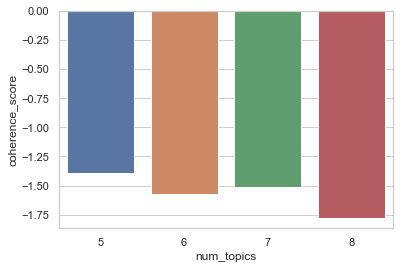

In [11]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=scoring_df.num_topics, y=scoring_df.coherence_score)

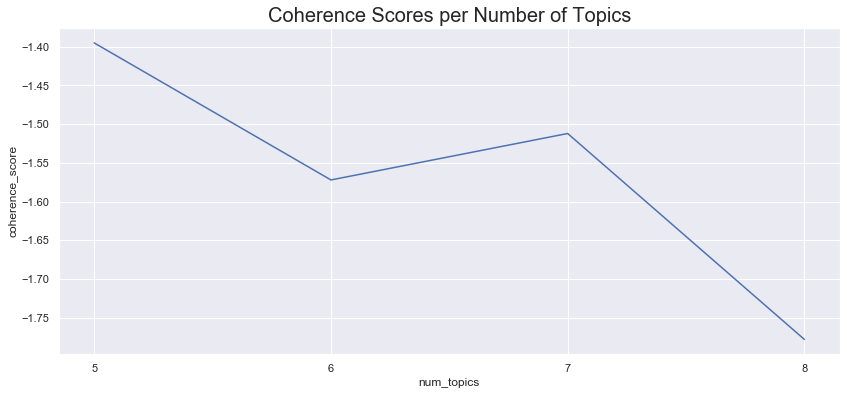

In [64]:
sns.set(rc={'figure.figsize':(14, 6)})
sns.set_theme(style="darkgrid")
ax = sns.lineplot(x=scoring_df.num_topics, y=scoring_df.coherence_score).set_title(
    'Coherence Scores per Number of Topics', fontsize=20)
ax.figure.savefig('exported_images/coherence_scores.jpg')

# plt.rcParams['figure.figsize']=(5,10)